In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [39]:
data=pd.read_csv('reviews_amsterdam.csv')

In [40]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [41]:
data.drop(['reviewer_id', 'reviewer_name', 'comments'], axis=1, inplace=True)


In [42]:
data.rename({'id':'review_count'}, axis=1, inplace=True)
data.review_count = 1

In [43]:
print("The first dataset has {} rows and {} columns.".format(*data.shape))
print("It contains {} duplicates.".format(data.duplicated().sum()))

The first dataset has 266861 rows and 3 columns.
It contains 4280 duplicates.


In [44]:
data.date = pd.to_datetime(data.date, format="%Y-%m-%d")

In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266861 entries, 0 to 266860
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   listing_id    266861 non-null  int64         
 1   review_count  266861 non-null  int64         
 2   date          266861 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.1 MB


In [46]:
data.tail(2)

,listing_id,review_count,date
266859,52974738,1,2021-11-02
266860,53043715,1,2021-10-31


In [47]:
from datetime import datetime
data=data.sort_values('date')

In [48]:
data
df_raw=data

In [49]:
data

,listing_id,review_count,date
0,2818,1,2009-03-30
1,2818,1,2009-04-24
2,2818,1,2009-05-03
3,2818,1,2009-05-18
4,2818,1,2009-05-25
...,...,...,...
41823,1196088,1,2021-11-03
253003,38632941,1,2021-11-03
171945,16389105,1,2021-11-03
200107,20857622,1,2021-11-03


In [50]:
count_2020_21=data[data["date"].isin(pd.date_range('2020-10-01', '2021-10-19'))]
count_2020_19=data[data["date"].isin(pd.date_range('2019-01-01', '2020-12-31'))]


In [51]:
count_2020_21.head(30)

,listing_id,review_count,date
193177,19715150,1,2020-10-01
203784,21486402,1,2020-10-01
243406,32624429,1,2020-10-01
259894,44149548,1,2020-10-01
262151,45525638,1,2020-10-01
232764,29268359,1,2020-10-01
44220,1320353,1,2020-10-01
256135,40914360,1,2020-10-01
256134,40914360,1,2020-10-01
162090,15110844,1,2020-10-01


In [54]:
print("The dataset 2020/2021 has {} reviews and {} columns.".format(*count_2020_21.shape))

The dataset 2020/2021 has 27063 reviews and 3 columns.


In [55]:
count_2020_21 = count_2020_21.set_index('date').sort_index()

In [56]:
count_2020_21_monthly = count_2020_21.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(reviews_per_month='count').reset_index()
                                                                       

In [57]:
count_2020_21_monthly.columns = ['date', 'listing_id', 'reviews_per_month']

In [58]:
count_2020_21_monthly.set_index('date', inplace=True)

In [59]:
count_2020_21_monthly.head(5)

,listing_id,reviews_per_month
date,,
2020-10-31,50523,1
2020-10-31,82482,1
2020-10-31,118097,1
2020-10-31,188347,1
2020-10-31,245927,1


In [60]:
count_2020_21_monthly=count_2020_21_monthly.reset_index()
count_2020_21_monthly=pd.DataFrame(count_2020_21_monthly.groupby('listing_id')['reviews_per_month'].mean().reset_index())

In [61]:
count_2020_21_monthly.head(10)

,listing_id,reviews_per_month
0,2818,1.50
1,27886,1.25
2,28871,5.00
3,29051,6.75
4,44391,2.00
5,47061,1.00
6,49552,3.50
7,49790,1.00
8,50523,1.00
9,55709,1.00


In [62]:
data_list=pd.read_csv("listings_amsterdam.csv")

In [63]:
data_list.tail(
)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5397,53121415,https://www.airbnb.com/rooms/53121415,20211104024252,2021-11-04,New - Cosy 2 Bedroom Apartment with a Balcony,This two bedroom apartment with private balcon...,The apartment is located on Nieuwmarkt (New Ma...,https://a0.muscache.com/pictures/miso/Hosting-...,303405414,https://www.airbnb.com/users/show/303405414,...,NaN,NaN,NaN,Exempt,t,5,5,0,0,NaN
5398,53124758,https://www.airbnb.com/rooms/53124758,20211104024252,2021-11-04,Lovely studio Dam square,<b>License number</b><br />Exempt,NaN,https://a0.muscache.com/pictures/21e8ea41-50a2...,300888539,https://www.airbnb.com/users/show/300888539,...,NaN,NaN,NaN,Exempt,f,7,4,3,0,NaN
5399,53127475,https://www.airbnb.com/rooms/53127475,20211104024252,2021-11-04,Mooi appartement vlakbij het centrum van Amste...,"Dit appartement ligt tegen de Jordaan, het cen...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6606794,https://www.airbnb.com/users/show/6606794,...,NaN,NaN,NaN,0363 7D55 6CDC 799D 50A1,t,1,1,0,0,NaN
5400,53131052,https://www.airbnb.com/rooms/53131052,20211104024252,2021-11-04,Comfortabele slaapervaring.,Kabinet type airconditioner<br />6､De keuken i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,430112294,https://www.airbnb.com/users/show/430112294,...,NaN,NaN,NaN,YUTG 5982 JU58 89EF F4B1,t,1,1,0,0,NaN
5401,53140075,https://www.airbnb.com/rooms/53140075,20211104024252,2021-11-04,New - Fancy 2 Bedroom Apartment with a Balcony,This 2 bedroom apartment with private balcony ...,NaN,https://a0.muscache.com/pictures/d0a6e596-a4ee...,303405414,https://www.airbnb.com/users/show/303405414,...,NaN,NaN,NaN,Exempt,t,5,5,0,0,NaN


In [64]:
data_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [65]:
data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5402 non-null   int64  
 1   listing_url                                   5402 non-null   object 
 2   scrape_id                                     5402 non-null   int64  
 3   last_scraped                                  5402 non-null   object 
 4   name                                          5402 non-null   object 
 5   description                                   5392 non-null   object 
 6   neighborhood_overview                         3908 non-null   object 
 7   picture_url                                   5402 non-null   object 
 8   host_id                                       5402 non-null   int64  
 9   host_url                                      5402 non-null   o

In [66]:
data_main=pd.merge(count_2020_21_monthly,data_list[['id', 'price', 'neighbourhood_group_cleansed', 
                          'latitude', 'longitude', 'property_type', 'accommodates', 
                          'bathrooms','room_type', 'bedrooms', 'beds', 'host_is_superhost','minimum_nights']], 
              left_on='listing_id', right_on='id')

In [67]:
data_main.drop(['id'], axis=1, inplace=True)

In [68]:


data_main.rename({'neighbourhood_group_cleansed':'neighbourhood'}, axis=1, inplace=True)

In [69]:
print("The dataset has {} rows and {} columns - after combining it.".format(*data_main.shape))
print("It contains {} duplicates.".format(data_main.duplicated().sum()))
data_main.head(50)

The dataset has 3053 rows and 14 columns - after combining it.
It contains 0 duplicates.


,listing_id,reviews_per_month,price,neighbourhood,latitude,longitude,property_type,accommodates,bathrooms,room_type,bedrooms,beds,host_is_superhost,minimum_nights
0,2818,1.500000,$59.00,NaN,52.364350,4.943580,Private room in rental unit,2,NaN,Private room,1.0,2.0,t,3
1,27886,1.250000,$135.00,NaN,52.387610,4.891880,Private room in houseboat,2,NaN,Private room,1.0,1.0,t,2
2,28871,5.000000,$75.00,NaN,52.367750,4.890920,Private room in rental unit,2,NaN,Private room,1.0,1.0,t,2
3,29051,6.750000,$55.00,NaN,52.365840,4.891110,Private room in rental unit,1,NaN,Private room,1.0,1.0,t,2
4,44391,2.000000,$240.00,NaN,52.371680,4.914710,Entire rental unit,4,NaN,Entire home/apt,2.0,2.0,f,3
5,47061,1.000000,$120.00,NaN,52.367860,4.874580,Entire rental unit,3,NaN,Entire home/apt,2.0,2.0,t,2
6,49552,3.500000,$157.00,NaN,52.380280,4.890890,Entire guest suite,3,NaN,Entire home/apt,2.0,2.0,t,3
7,49790,1.000000,$250.00,NaN,52.361580,4.861010,Boat,4,NaN,Entire home/apt,2.0,2.0,f,3
8,50523,1.000000,$118.00,NaN,52.368110,4.882620,Private room in bed and breakfast,2,NaN,Private room,1.0,1.0,f,2
9,55709,1.000000,$100.00,NaN,52.358112,4.897637,Entire loft,3,NaN,Entire home/apt,1.0,1.0,f,4


In [70]:
data_main['minimum_nights'].mean()


3.436292171634458

In [71]:
data_main['reviews_per_month'].mean()

1.9915943847977942

In [72]:
data_main.price = data_main.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [73]:
data_main['price'].describe()

count    3053.000000
mean      157.995087
std        99.786760
min         0.000000
25%        95.000000
50%       133.000000
75%       190.000000
max      1399.000000
Name: price, dtype: float64

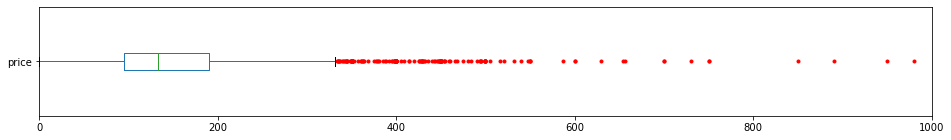

In [74]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_main['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

75% of data is 246 dollars .so lets remove extremly priced above 450 

In [77]:
data_main.drop(data_main[data_main['price'] > 450].index, axis=0, inplace=True)
data_main['price'].describe()

count    2929.00000
mean      144.13281
std        67.92846
min         0.00000
25%        94.00000
50%       130.00000
75%       180.00000
max       350.00000
Name: price, dtype: float64

Monthly Occupancy Rate = Average Length of Stay * (No. of reviews per Month / Review Rate)
According to the latest Airbnb update, guests who booked stays in amsterdam in 2021 via Airbnb spent 3.9 nights here on average.

Yearly Income = Monthly Occupancy Rate Price 12 Months

In [79]:
avg_length_of_stay=3.9
review_rate_modest=0.5

In [80]:
data_main['modest_occupancy'] = round(avg_length_of_stay * (data_main['reviews_per_month']/review_rate_modest), 2)

In [81]:
len(data_main[data_main['modest_occupancy'] > 100])

12

In [82]:
data_main.drop(data_main[(data_main['modest_occupancy'] > 100)].index, axis=0, inplace=True)

In [83]:
data_main['modest_occupancy'].describe()

count    2917.000000
mean       14.817707
std         9.810528
min         7.800000
25%         7.800000
50%        11.700000
75%        18.200000
max        99.450000
Name: modest_occupancy, dtype: float64

In [84]:
data_main['optimistic_occupancy'] = round(avg_length_of_stay * (data_main['reviews_per_month']/0.4), 2)

In [85]:
len(data_main[data_main['optimistic_occupancy'] > 100])

6

In [86]:
data_main['optimistic_occupancy'].describe()

count    2917.000000
mean       18.521834
std        12.263337
min         9.750000
25%         9.750000
50%        14.620000
75%        22.750000
max       124.310000
Name: optimistic_occupancy, dtype: float64

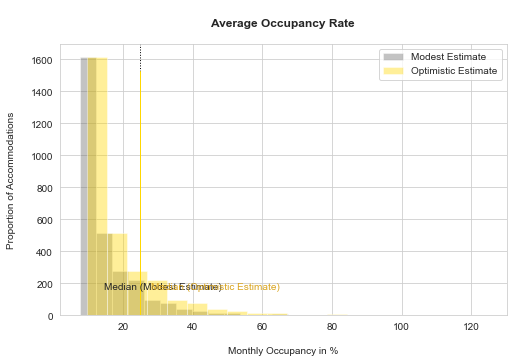

In [87]:

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(data_main['modest_occupancy'], kde=False, bins=20, color='dimgrey')
sns.distplot(data_main['optimistic_occupancy'], kde=False, bins=20, color='gold')

plt.title('\nAverage Occupancy Rate\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nMonthly Occupancy in %')
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=25, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(14.5, 165, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=25, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='gold')
plt.text(28, 165, 'Median (Optimistic Estimate)', color='goldenrod');

In [88]:
data_main['modest_income'] = data_main['modest_occupancy'] * data_main['price'] * 12
data_main.modest_income.describe()

count      2917.000000
mean      24351.704285
std       19368.374926
min           0.000000
25%       12916.800000
50%       19468.800000
75%       29577.600000
max      345708.000000
Name: modest_income, dtype: float64

In [89]:
data_main['optimistic_income'] = data_main['optimistic_occupancy'] * data_main['price'] * 12
data_main.optimistic_income.describe()

count      2917.000000
mean      30439.064573
std       24210.426093
min           0.000000
25%       16140.480000
50%       24336.000000
75%       36972.000000
max      432135.000000
Name: optimistic_income, dtype: float64

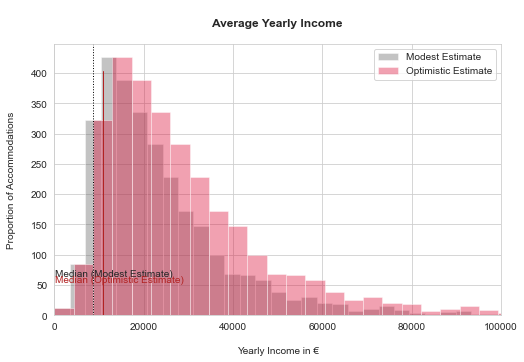

In [90]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(data_main['modest_income'], kde=False, bins=100, color='dimgrey')
sns.distplot(data_main['optimistic_income'], kde=False, bins=100, color='crimson')

plt.title('\nAverage Yearly Income\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nYearly Income in €')
plt.xlim((0,100000))
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=8709, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(60, 65, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=10886, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='firebrick')
plt.text(100, 55, 'Median (Optimistic Estimate)', color='firebrick');

# To examine if there's an underlying seasonality, let's split the dataset we loaded at the very beginning by year


In [54]:
df_raw.tail(100)

,listing_id,review_count,date
74601,18584891,1,2021-10-17
125321,50187850,1,2021-10-17
109322,35836205,1,2021-10-17
126381,51329497,1,2021-10-17
121751,48014985,1,2021-10-17
...,...,...,...
61055,15018607,1,2021-10-19
100278,28494167,1,2021-10-19
116169,42975758,1,2021-10-19
126444,51446014,1,2021-10-19


In [119]:
pf=df_raw[df_raw["date"].isin(pd.date_range('2021-01-01', '2021-10-10'))]

count_2021=pf
count_2021 = count_2021.set_index('date').sort_index()

In [120]:
count_2021

,listing_id,review_count
date,,
2021-01-01,36237250,1
2021-01-01,36237250,1
2021-01-01,45349148,1
2021-01-01,36237250,1
2021-01-01,36237250,1
...,...,...
2021-10-10,41283883,1
2021-10-10,14868157,1
2021-10-10,29664067,1


In [140]:
count_2021 = df_raw[df_raw["date"].isin(pd.date_range('2021-01-01', '2021-10-19'))]
count_2020 = df_raw[df_raw["date"].isin(pd.date_range('2020-01-01', '2020-12-31'))]
count_2019 = df_raw[df_raw["date"].isin(pd.date_range('2019-01-01', '2019-12-31'))]
count_2018 = df_raw[df_raw["date"].isin(pd.date_range('2018-01-01', '2018-12-31'))]


# set the date as index and sort by index
count_2021 = count_2021.set_index('date').sort_index()
count_2020 = count_2020.set_index('date').sort_index()
count_2019 = count_2019.set_index('date').sort_index()
count_2018 = count_2018.set_index('date').sort_index()

# calculate reviews per month    
count_2021_monthly = count_2021.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_21='count').reset_index()
count_2020_monthly = count_2020.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_20='count').reset_index()
count_2019_monthly = count_2019.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_19='count').reset_index()
count_2018_monthly = count_2018.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_18='count').reset_index()

# flatten the multi-index
count_2021_monthly.columns = ['date', 'listing_id', 'reviews_per_month_21']
count_2020_monthly.columns = ['date', 'listing_id', 'reviews_per_month_20']
count_2019_monthly.columns = ['date', 'listing_id', 'reviews_per_month_19']
count_2018_monthly.columns = ['date', 'listing_id', 'reviews_per_month_18']

# set date as index
count_2021_monthly.set_index('date', inplace=True)
count_2020_monthly.set_index('date', inplace=True)
count_2019_monthly.set_index('date', inplace=True)
count_2018_monthly.set_index('date', inplace=True)


In [141]:
count_2021_monthly

,listing_id,reviews_per_month_21
date,,
2021-01-31,190170,1
2021-01-31,197727,1
2021-01-31,197972,1
2021-01-31,561769,1
2021-01-31,891661,1
...,...,...
2021-10-31,52613030,1
2021-10-31,52614016,1
2021-10-31,52615785,1


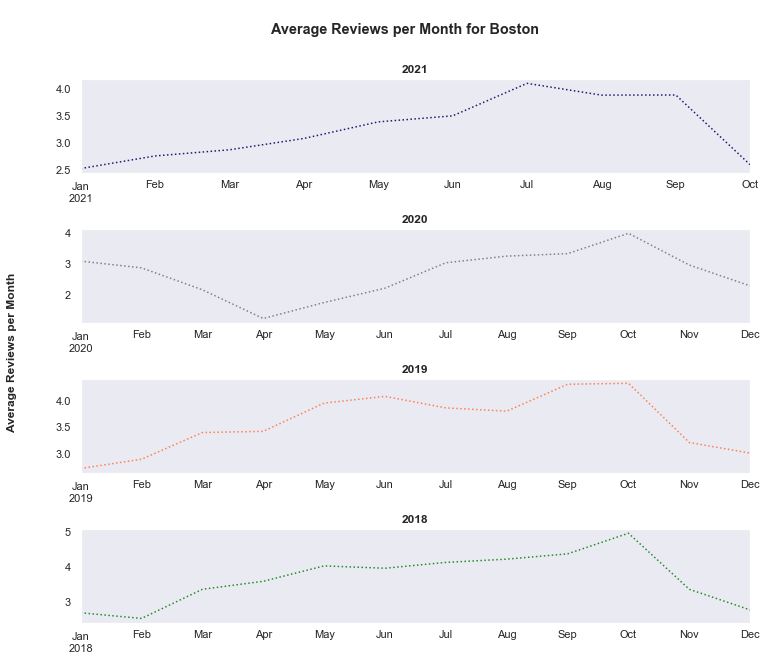

In [142]:
sns.set(style="dark")
fig, axes = plt.subplots(4, 1, figsize=(12,10))

sub_1 = count_2021_monthly.groupby('date')['reviews_per_month_21'].mean()
sub_1.plot(ax=axes[0], color='midnightblue', style=':')
axes[0].set_title('2021', fontweight='bold')
axes[0].set_xlabel('') 

sub_2 = count_2020_monthly.groupby('date')['reviews_per_month_20'].mean()
sub_2.plot(ax=axes[1], color='grey', style=':')
axes[1].set_title('2020', fontweight='bold')
axes[1].set_xlabel('') 

sub_3 = count_2019_monthly.groupby('date')['reviews_per_month_19'].mean()
sub_3.plot(ax=axes[2], color='coral', style=':')
axes[2].set_title('2019', fontweight='bold')
axes[2].set_xlabel('') 

sub_4 = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
sub_4.plot(ax=axes[3], color='forestgreen', style=':')
axes[3].set_title('2018', fontweight='bold')
axes[3].set_xlabel('') 



# adjust space between subplots and set a title
plt.subplots_adjust(hspace = 0.6)
plt.suptitle('\nAverage Reviews per Month for Boston\n', fontweight='bold')

# plot common y-label
fig.text(0.04, 0.5, 'Average Reviews per Month', fontweight='bold', va='center', rotation='vertical');

# from above dataset we can observe that october is the peak season 
may-september there is peak season and then 

# sipke_detection


# 2019

In [91]:
count_2021 = data[data["date"].isin(pd.date_range('2019-01-01', '2021-10-19'))]


In [92]:
data2 = data[data["date"].isin(pd.date_range('2019-01-01', '2019-12-31'))]

In [108]:
season_19=pd.merge(data2,data_list[['id', 'price','property_type']], 
              left_on='listing_id', right_on='id')
season_19.drop(['review_count', 'id'], axis='columns', inplace=True)
season_19.price =season_19.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [109]:
season_19_peak=season_19[season_19["date"].isin(pd.date_range('2019-05-01', '2019-6-30'))]
season_19_peak_2=season_19[season_19["date"].isin(pd.date_range('2019-09-01', '2019-10-31'))]
p1=season_19_peak_2['price'].mean()
p2=season_19_peak['price'].mean()
res1=(p1+p2)/2
season_19_off=season_19[season_19["date"].isin(pd.date_range('2019-11-01', '2019-12-31'))]
season_19_off
p3=season_19_off['price'].mean()
season_19_off2=season_19[season_19["date"].isin(pd.date_range('2019-01-01', '2019-02-28'))]
p4=season_19_off2['price'].mean()
res2=(p3+p4)/2
(res1-res2)/res1

0.0006887876196240354

In [110]:
data3 = data[data["date"].isin(pd.date_range('2018-01-01', '2018-12-31'))]

In [111]:
data3

,listing_id,review_count,date
89082,4610921,1,2018-01-01
124426,9003963,1,2018-01-01
182724,18045687,1,2018-01-01
65846,2708863,1,2018-01-01
148665,13013727,1,2018-01-01
...,...,...,...
47728,1484957,1,2018-12-31
4056,82482,1,2018-12-31
136331,11084718,1,2018-12-31
190313,19166669,1,2018-12-31


In [112]:
season_18=pd.merge(data3,data_list[['id', 'price','neighbourhood_cleansed','property_type']], 
              left_on='listing_id', right_on='id')
season_18.drop(['review_count', 'id'], axis='columns', inplace=True)


In [113]:

season_18.price =season_18.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [114]:
season_18

,listing_id,date,price,neighbourhood_cleansed,property_type
0,4610921,2018-01-01,300,De Baarsjes - Oud-West,Houseboat
1,4610921,2018-02-07,300,De Baarsjes - Oud-West,Houseboat
2,4610921,2018-02-11,300,De Baarsjes - Oud-West,Houseboat
3,4610921,2018-02-24,300,De Baarsjes - Oud-West,Houseboat
4,4610921,2018-03-25,300,De Baarsjes - Oud-West,Houseboat
...,...,...,...,...,...
51731,27774794,2018-12-31,159,Oud-Noord,Entire rental unit
51732,31072801,2018-12-31,195,Centrum-Oost,Private room in bed and breakfast
51733,30946085,2018-12-31,297,Centrum-West,Entire rental unit
51734,18298091,2018-12-31,61,Zuid,Private room in rental unit


In [115]:
tr=pd.DataFrame(data_list.groupby('neighbourhood_cleansed')['id'].nunique())


In [116]:
df=season_18.groupby(['neighbourhood_cleansed']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()


In [117]:
df=season_18.groupby(['date','listing_id']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()
df

date listing_id price          
                              min  max mean
0     2018-01-01     168769    88   88   88
1     2018-01-01     214531   115  115  115
2     2018-01-01     311124   220  220  220
3     2018-01-01     396125    85   85   85
4     2018-01-01     445660    70   70   70
...          ...        ...   ...  ...  ...
51693 2018-12-31   30812596    97   97   97
51694 2018-12-31   30904739    75   75   75
51695 2018-12-31   30930837   117  117  117
51696 2018-12-31   30946085   297  297  297
51697 2018-12-31   31072801   195  195  195

[51698 rows x 5 columns]

In [118]:

filtered_data = df[df['listing_id']==1071235]
filtered_data

Empty DataFrame
Columns: [(date, ), (listing_id, ), (price, min), (price, max), (price, mean)]
Index: []

In [119]:
df=season_19.groupby(['property_type']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()
df

property_type price                  
                                          min   max        mean
0                                  Barn    85    85   85.000000
1                                  Boat    19   843  266.125000
2                                   Bus    50    50   50.000000
3                          Entire cabin    88   200  174.153846
4                         Entire chalet    90   125  117.125000
5            Entire condominium (condo)    51   600  171.411326
6                        Entire cottage   181   324  216.750000
7                    Entire guest suite    75   344  116.446777
8                     Entire guesthouse    80   302  129.254717
9                           Entire loft    70  1160  228.861111
10                         Entire place    98   299  171.384615
11                   Entire rental unit    45   857  174.502241
12              Entire residential home    34   850  221.543091
13            Entire serviced apartment   160   729  252.417031
14                     Entire townhouse    85   810  240.834795
15                         Entire villa   165   448  320.727273
16                            Houseboat   100  1190  209.524252
17                         Private room    95   115   95.814815
18    Private room in bed and breakfast    26   500  113.024203
19                 Private room in boat    73   797  122.933602
20             Private room in bungalow    95    95   95.000000
21                Private room in cabin    96   117  102.681818
22  Private room in condominium (condo)    27   224   89.308054
23            Private room in farm stay    82   103   87.260870
24          Private room in guest suite    52   399  109.085944
25           Private room in guesthouse    51   533   77.203008
26               Private room in hostel   125   198  178.186782
27            Private room in houseboat    50   327  104.174441
28               Private room in island    75    75   75.000000
29                 Private room in loft    55   200  113.904847
30          Private room in rental unit     9   600   90.028188
31     Private room in residential home    26   231   79.006810
32   Private room in serviced apartment   180   328  203.172414
33           Private room in tiny house   143   143  143.000000
34            Private room in townhouse    30   205   88.816395
35                Private room in villa    65   175   85.120000
36                   Room in aparthotel   269   499  378.550000
37            Room in bed and breakfast    79   289  128.353268
38               Room in boutique hotel    53   325  106.689922
39                       Room in hostel    25   167   47.439394
40                        Room in hotel    85   123  106.660000
41           Room in serviced apartment   152   900  165.664093
42     Shared room in bed and breakfast   145   145  145.000000
43                Shared room in hostel    32    40   36.997033
44             Shared room in houseboat   205   336  277.050000
45           Shared room in rental unit    45   100   78.557692
46      Shared room in residential home    50    60   57.500000
47                                Tower   326   326  326.000000